In [159]:
!pip install minisom

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"

url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/1ssplit%20combined%20dataset%20CAIDA%202007.csv"

df = pd.read_csv(url)



In [161]:
# Display the first few rows of the dataset to understand its structure
print(df.head())




   etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  label
0  2.532222  0.000000  0.000000     0.000000          358      0
1  2.488470  0.000000  0.000000     0.000000          342      0
2  2.523971  0.000000  0.000000     0.000000          367      0
3  2.763893  1.445125  3.094029     0.999693          582      0
4  2.968837  0.483287  3.276253     0.996651          646      0


In [162]:
# Check the data types and basic statistics of the numerical columns
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   etpSrcIP     3642 non-null   float64
 1   etpSrcP      3642 non-null   float64
 2   etpDstP      3642 non-null   float64
 3   etpProtocol  3642 non-null   float64
 4   totalPacket  3642 non-null   int64  
 5   label        3642 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 170.8 KB
None
          etpSrcIP      etpSrcP      etpDstP  etpProtocol    totalPacket  \
count  3642.000000  3642.000000  3642.000000  3642.000000    3642.000000   
mean      8.190307     0.821645     0.642794     0.312597   91315.843767   
std       4.671243     0.537582     0.603258     0.215882   80550.213215   
min       1.972757     0.000000     0.000000     0.000000     199.000000   
25%       2.558671     0.194504     0.132180     0.162907     376.000000   
50%      11.935840     1.152392     0.765670 

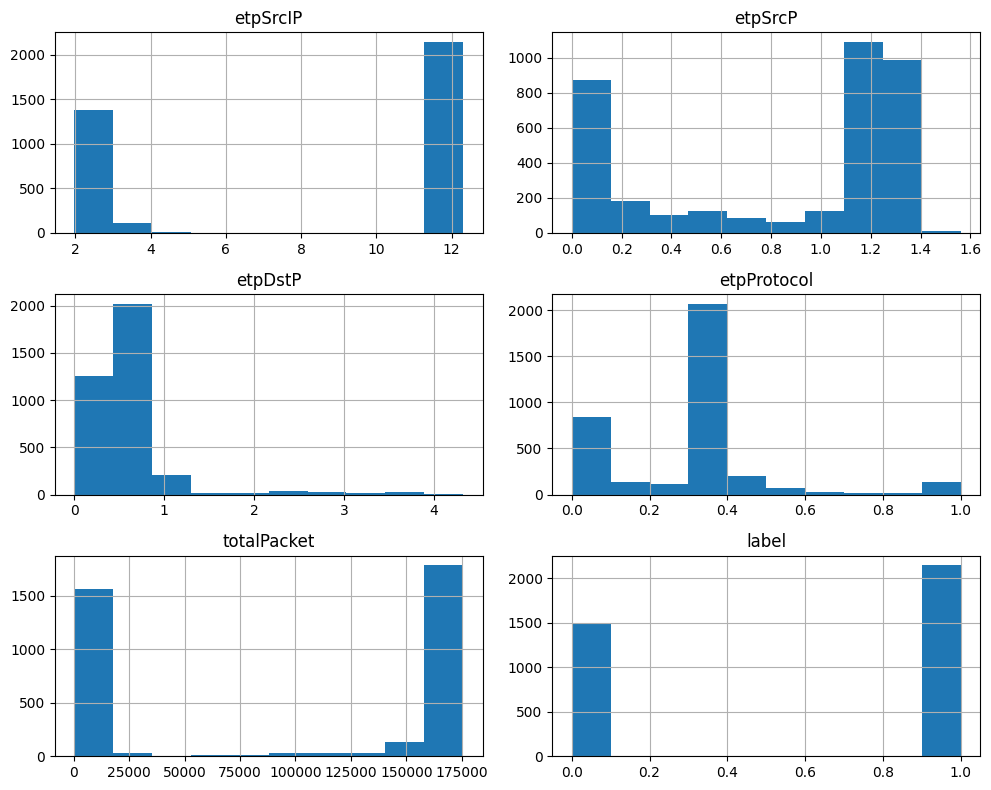

In [163]:
# Data Visualization
# Plotting histograms for numerical features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()



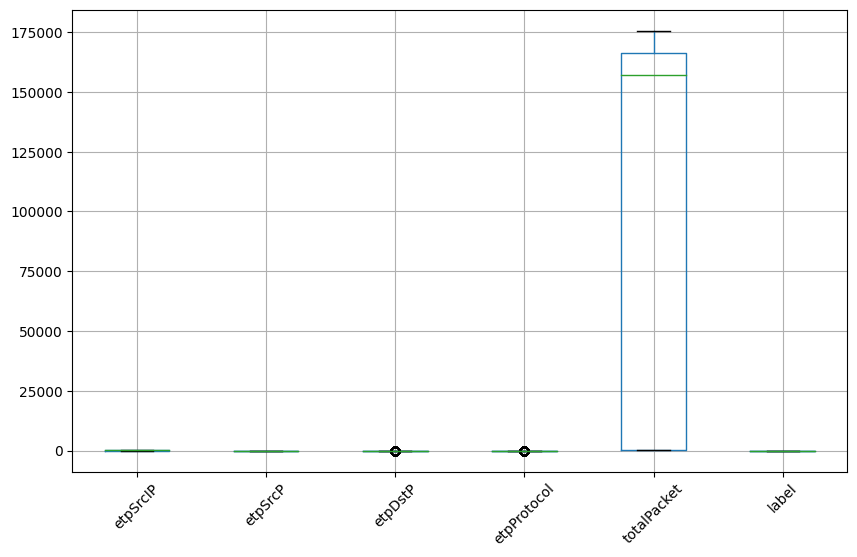

In [164]:
# Boxplot for numerical features
df.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

# You can also create other types of plots like scatter plots, bar plots, etc. based on your analysis needs

In [165]:
import numpy as np

In [166]:
df = pd.read_csv(url)

# Define the columns to exclude from normalization
exclude_cols = ['label']  # Add more columns here if needed

# Calculate and store the mean and standard deviation for each dimension, excluding specified columns
mean_std_dict = {}
for col in df.columns:
    if col not in exclude_cols:
        mean_std_dict[col] = (df[col].mean(), df[col].std())

# Define the function for normalization using tanh-estimator method, excluding specified columns
def normalize_with_tanh_estimator(data, mean_std_dict, exclude_cols):
    normalized_data = pd.DataFrame()
    for col in data.columns:
        if col not in exclude_cols:
            mu, sigma = mean_std_dict[col]
            normalized_col = 0.5 * (np.tanh(0.1 * ((data[col] - mu) / sigma)) + 1)
            normalized_data[col] = normalized_col
        else:
            normalized_data[col] = data[col]  # Keep excluded columns as they are
    return normalized_data

# Normalize the dataset using tanh-estimator method, excluding specified columns
normalized_df = normalize_with_tanh_estimator(df, mean_std_dict, exclude_cols)

# Display the first few rows of the normalized dataset
print(normalized_df.head())

# Store mean_std_dict for later use in real-time operation
# You can save it to a file or store it in memory, depending on your requirements


   etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  label
0  0.439732  0.424169  0.446924     0.428102     0.443778      0
1  0.439270  0.424169  0.446924     0.428102     0.443769      0
2  0.439644  0.424169  0.446924     0.428102     0.443784      0
3  0.442177  0.557731  0.692677     0.653973     0.443916      0
4  0.444342  0.468571  0.705386     0.653335     0.443955      0


In [167]:
mean_std_dict

{'etpSrcIP': (8.190306608012389, 4.671242892361211),
 'etpSrcP': (0.8216450872309152, 0.5375819288246159),
 'etpDstP': (0.6427942321236431, 0.6032580288157494),
 'etpProtocol': (0.3125974076460473, 0.21588204176307935),
 'totalPacket': (91315.8437671609, 80550.21321458195)}

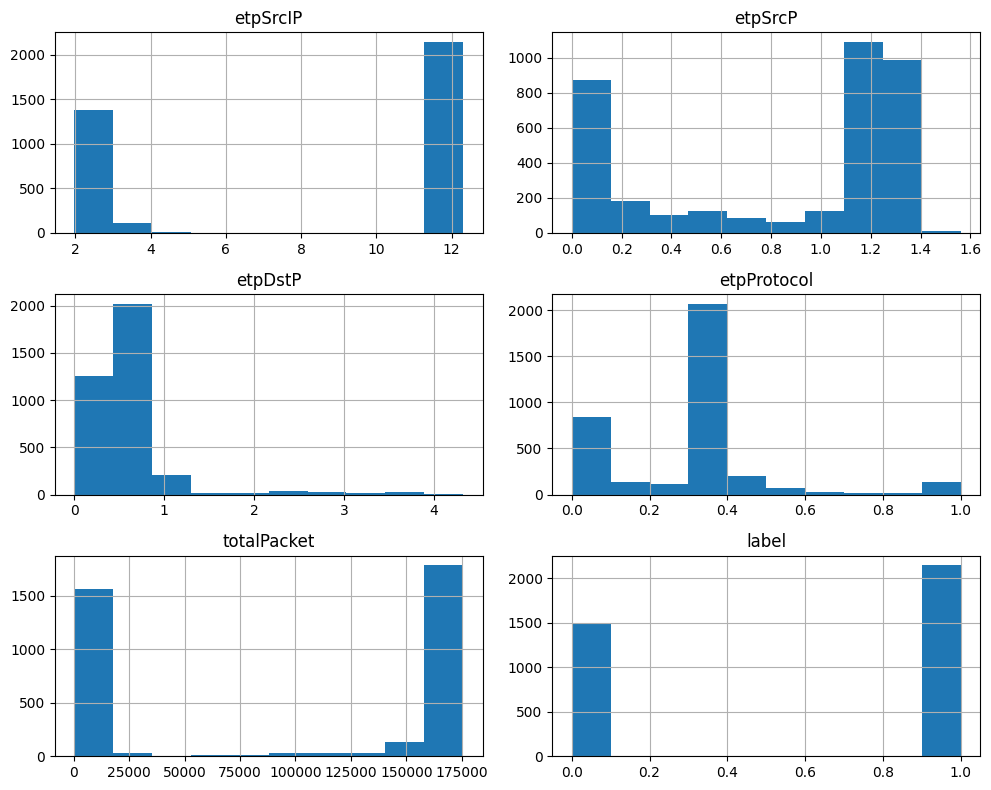

In [168]:
# Data Visualization
# Plotting histograms for numerical features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X = normalized_df.iloc[:, :-1].values
y = normalized_df.iloc[:, -1].values


In [171]:
data = X

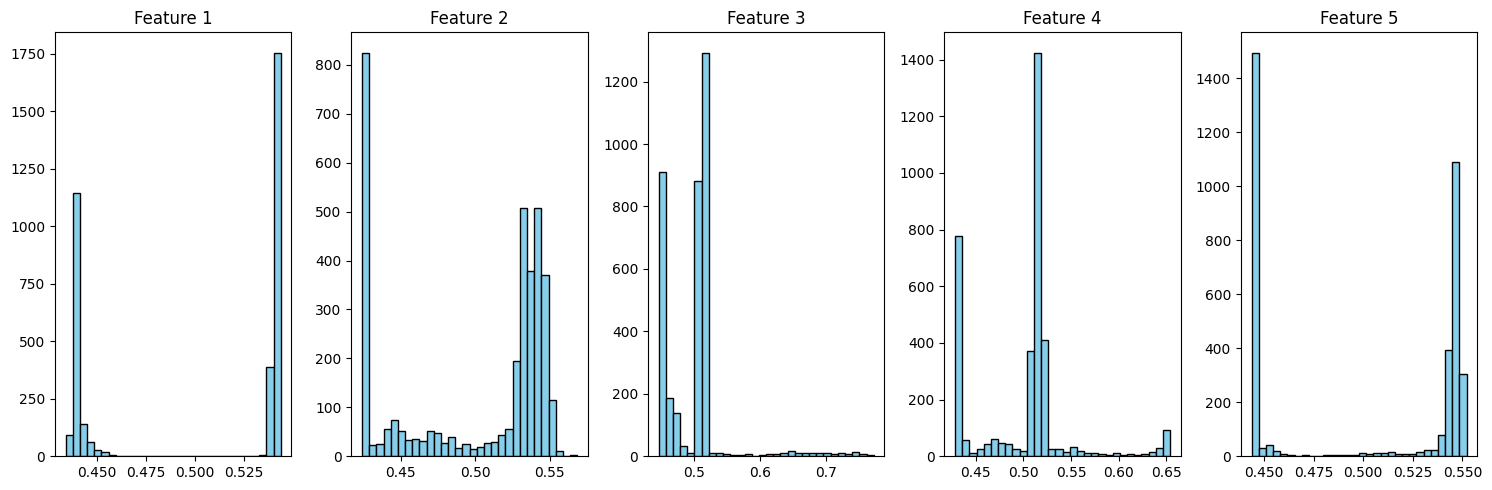

In [172]:
# Plot histograms for each numerical feature
num_features = data.shape[1]  # Get the number of features
fig, axs = plt.subplots(1, num_features, figsize=(15, 5))  # Create subplots

for i in range(num_features):
    axs[i].hist(data[:, i], bins=30, color='skyblue', edgecolor='black')  # Plot histogram
    axs[i].set_title(f'Feature {i+1}')  # Set title for each subplot

plt.tight_layout()  # Adjust layout
plt.show()  # Show plot

In [173]:
X

array([[0.43973151, 0.42416911, 0.44692383, 0.42810175, 0.44377842],
       [0.43927006, 0.42416911, 0.44692383, 0.42810175, 0.44376862],
       [0.43964447, 0.42416911, 0.44692383, 0.42810175, 0.44378394],
       ...,
       [0.53967116, 0.53121243, 0.50871737, 0.51051741, 0.54870537],
       [0.53968373, 0.52932552, 0.50765785, 0.50954553, 0.5458337 ],
       [0.53968297, 0.53175472, 0.5088891 , 0.51077795, 0.54872627]])

In [174]:

y

array([0, 0, 0, ..., 1, 1, 1])

Column Name		Missing Values
----------------------------------
etpSrcIP			0
etpSrcP			0
etpDstP			0
etpProtocol			0
totalPacket			0
label			0


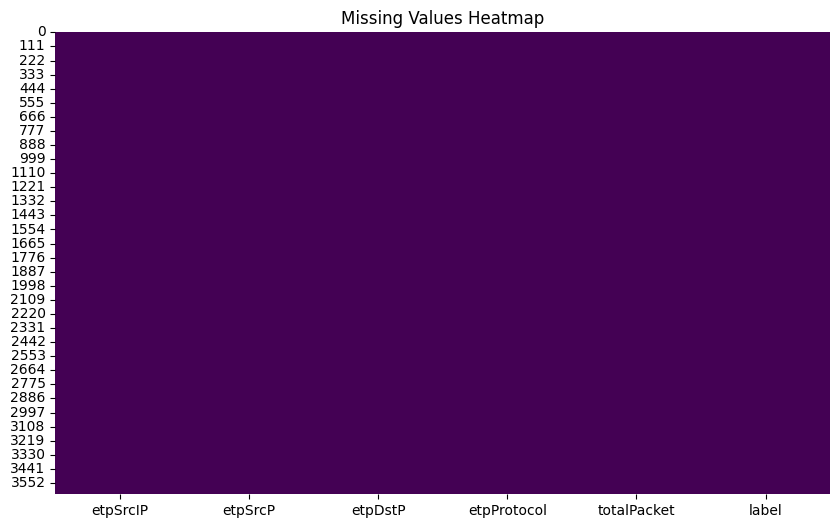

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Listing columns and their respective number of missing values
missing_values = df.isnull().sum()

# Displaying the missing values
print("Column Name\t\tMissing Values")
print("----------------------------------")
for column, missing_count in missing_values.items():
    print(f"{column}\t\t\t{missing_count}")

# Creating a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


In [176]:
# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [177]:
import matplotlib.pyplot as plt

In [178]:
from minisom import MiniSom
from sklearn.neighbors import KNeighborsClassifier


In [179]:
# Initialize and train SOM
som_size = 30  # Example size, adjust based on your dataset

In [180]:
som = MiniSom(som_size, som_size, X_train.shape[1], sigma=15, learning_rate=0.8, random_seed=0 )



In [181]:
som.random_weights_init(X_train)

In [182]:
u_matrixfirst = som.distance_map()  # Get the U-matrix

In [183]:
# # Plot the U-matrix
# plt.figure(figsize=(6, 6))
# plt.pcolor(u_matrixfirst, cmap='viridis')  # Use 'viridis' colormap for better visualization
# plt.colorbar()
# plt.title('U-matrix')
# plt.show()


In [184]:
# # Create plots to visualize the SOM before and after training
# plt.figure(figsize=(12, 6))

# # Plot before training
# plt.subplot(1, 2, 1)
# plt.title("SOM Before Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map

# # Plot data points with labels before training
# for i, (x, y) in enumerate(X_train):
#     color = 'r' if y_train[i] == 1 else 'b'  # red for label 1, blue for label 0
#     plt.plot(x, y, marker='o', color=color, markersize=5)

# # Train the SOM for 1000 epochs
# som.train_batch(X_train, 1000, verbose = 'true')

# # Plot after training
# plt.subplot(1, 2, 2)
# plt.title("SOM After Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map

# # Plot data points with labels after training
# for i, (x, y) in enumerate(X_train):
#     color = 'r' if y_train[i] == 1 else 'b'  # red for label 1, blue for label 0
#     plt.plot(x, y, marker='o', color=color, markersize=5)

# plt.colorbar()
# plt.tight_layout()
# plt.show()

In [185]:
# # Visualize the SOM before training
# plt.figure(figsize=(6, 6))
# plt.title("SOM Before Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map
# plt.colorbar()
# plt.show()

In [186]:
# Train the SOM for 1000 epochs
# som.train_batch(X_train, 10000000, verbose = "true")
som.train_batch(X_train, 100000, verbose = "true")

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.007880980132180833


In [187]:
import pickle

In [188]:
# with open('som.p', 'rb') as infile:
#     som = pickle.load(infile)

In [189]:
u_matrixlast = som.distance_map()  # Get the U-matrix

In [190]:
# # Plot the U-matrix
# plt.figure(figsize=(6, 6))
# plt.pcolor(u_matrixlast, cmap='viridis')  # Use 'viridis' colormap for better visualization
# plt.colorbar()
# plt.title('U-matrix')
# plt.show()


In [191]:
# # Visualize the SOM after training
# plt.figure(figsize=(6, 6))
# plt.title("SOM After Training")
# plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map
# plt.colorbar()
# plt.show()


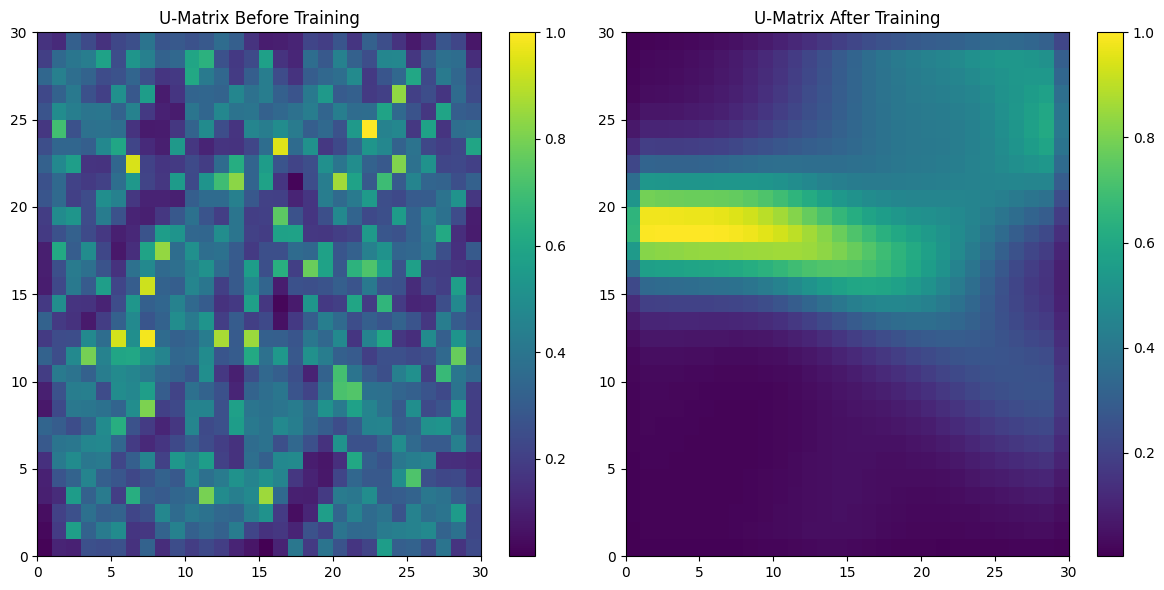

In [192]:
# Plot the U-Matrix before training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("U-Matrix Before Training")
plt.pcolor(u_matrixfirst, cmap='viridis')
plt.colorbar()

# Plot the U-Matrix after training
plt.subplot(1, 2, 2)
plt.title("U-Matrix After Training")
plt.pcolor(u_matrixlast, cmap='viridis')
plt.colorbar()

plt.tight_layout()
plt.show()

In [193]:
import pickle

In [194]:
# # saving the som in the file som.p
# with open('som.p', 'wb') as outfile:
#     pickle.dump(som, outfile)

In [195]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [196]:
def map_to_bmu(som, X):
    winner_coordinates = np.array([som.winner(x) for x in X]).T
    return np.ravel_multi_index(winner_coordinates, (som.get_weights().shape[0], som.get_weights().shape[1]))

# Example usage:
# Assuming 'som' is your trained MiniSom model and 'X' is your input data

# Map input data to BMUs
cluster_index = map_to_bmu(som, X_train)

# Initialize k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Example k value, adjust based on your dataset

# Fit k-NN classifier using cluster indices as features
knn.fit(cluster_index.reshape(-1, 1), y_train)  # Assuming 'y' is your target labels

# Example prediction (you can replace X_test with real-time data)
# Assuming 'X_test' is your test set and 'y_test' is your test set labels
test_cluster_index = map_to_bmu(som, X_test)
y_pred = knn.predict(test_cluster_index.reshape(-1, 1))



In [197]:
y_pred.shape

(1202,)

In [198]:
y_test.shape

(1202,)

In [199]:
y_train.shape

(2440,)

In [200]:
X.shape

(3642, 5)

In [201]:
# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       518
           1       1.00      1.00      1.00       684

    accuracy                           1.00      1202
   macro avg       1.00      1.00      1.00      1202
weighted avg       1.00      1.00      1.00      1202



In [202]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [203]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


In [204]:
roc_auc = auc(fpr, tpr)


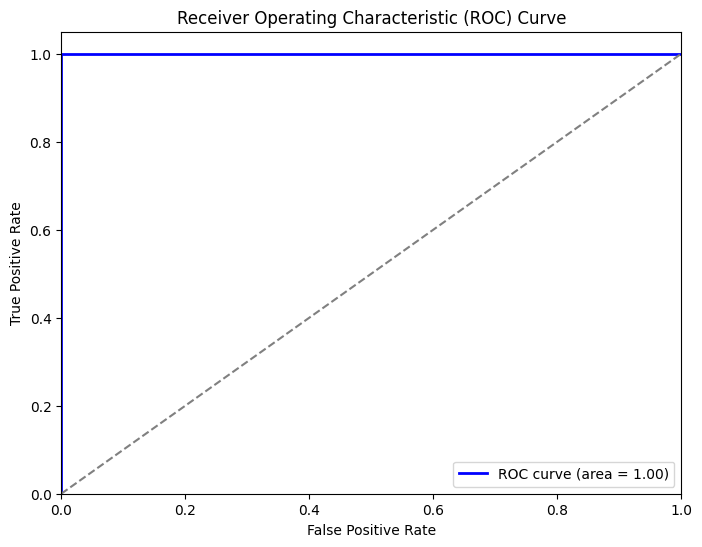

In [205]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [206]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed


# Step 4: Train the classifier
knn.fit(X_train, y_train)

# Step 5: Make predictions on the testing set
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model
# Option 1: Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Option 2: Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Option 3: Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Option 4: Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       518
           1       1.00      1.00      1.00       684

    accuracy                           1.00      1202
   macro avg       1.00      1.00      1.00      1202
weighted avg       1.00      1.00      1.00      1202

Confusion Matrix:
[[518   0]
 [  0 684]]
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


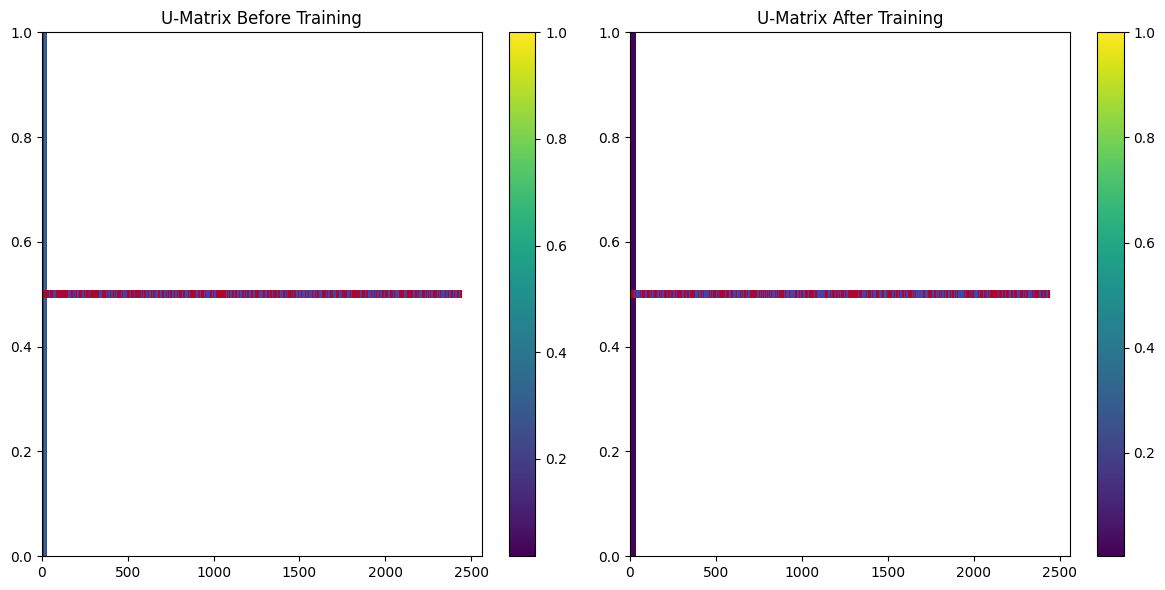

In [207]:
import matplotlib.pyplot as plt

# Assuming y_train contains the labels (0 and 1) for each data point

# Plot the U-Matrix before training
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("U-Matrix Before Training")
plt.pcolor(u_matrixfirst, cmap='viridis')
plt.colorbar()

# Add labels for the data points
plt.scatter(range(len(y_train)), [0.5] * len(y_train), c=y_train, cmap='coolwarm', marker='|')
plt.ylim(0, 1)  # Adjust y-axis limits for the labels

# Plot the U-Matrix after training
plt.subplot(1, 2, 2)
plt.title("U-Matrix After Training")
plt.pcolor(u_matrixlast, cmap='viridis')
plt.colorbar()

# Add labels for the data points
plt.scatter(range(len(y_train)), [0.5] * len(y_train), c=y_train, cmap='coolwarm', marker='|')
plt.ylim(0, 1)  # Adjust y-axis limits for the labels

plt.tight_layout()
plt.show()
